**Implementation of batch gradient descent from scratch**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_xls = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Lab4-data.xlsx', dtype=str, index_col=None)
data_xls.to_csv('csvfile.csv', encoding='utf-8', index=False)

In [ ]:
# Display any 5 randomly chosen records of data
# ------- Write the code here ---------
df = pd.read_csv('csvfile.csv')
df.head()

,x1,x2,y
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [ ]:
from sklearn import preprocessing

# Perform scaling of data features x1 and x2 and display scaled features
# ------- Write the code here ---------

scaler = preprocessing.MinMaxScaler()
scaled_X = scaler.fit_transform(df.iloc[:, :-2])
scaled_X

array([[0.08827586],
       [0.62068966],
       [0.22068966],
       [0.24862069],
       [0.13793103],
       [0.12758621],
       [0.6662069 ],
       [0.86206897],
       [0.17586207],
       [1.        ],
       [0.34482759],
       [0.68448276],
       [0.06896552],
       [0.10344828],
       [0.5       ],
       [0.12931034],
       [0.13103448],
       [0.25517241],
       [0.67931034],
       [0.        ]])

In [ ]:
# Perform scaling of dependent variable
# ------- Write the code here ---------

scaler = preprocessing.MinMaxScaler()
y = df.iloc[:, -1]
y = y.to_numpy().reshape(-1, 1)
scaled_y = scaler.fit_transform(y)
scaled_y 

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

Write the definition of Batch Gradient Descent

In [ ]:
from sklearn.metrics import mean_squared_error

def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape = (number_of_features))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        w_grad = -(2/total_samples) * (X.T.dot(y_true - y_predicted))
        b_grad = -(2/total_samples) * np.sum(y_true - y_predicted)
        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad
        cost = mean_squared_error(y_true, y_predicted)
        if i % 10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        print("Epoch: {} Cost: {}".format(i, cost))
    return w, b, cost, cost_list, epoch_list

In [ ]:
df = pd.read_csv("csvfile.csv")
X = df.iloc[:, :-1].to_numpy()
y_true = df.iloc[:, -1].to_numpy()
w, b, cost, cost_list, epoch_list = batch_gradient_descent(X, y_true, epochs = 10, learning_rate = 0.01)
print("Final Weights: {}".format(w))
print("Final Bias: {}".format(b))

Epoch: 0 Cost: 3689431.7672449998
Epoch: 1 Cost: 2.39414096079577e+16
Epoch: 2 Cost: 1.5536396939828843e+26
Epoch: 3 Cost: 1.0082097663610158e+36
Epoch: 4 Cost: 6.542616907398172e+45
Epoch: 5 Cost: 4.245727171585902e+55
Epoch: 6 Cost: 2.7551971131244767e+65
Epoch: 7 Cost: 1.7879413408784693e+75
Epoch: 8 Cost: 1.160256093182787e+85
Epoch: 9 Cost: 7.529297359981388e+94
Final Weights: [1.10138498e+49 1.63795609e+46]
Final Bias: 4.980602120207803e+45


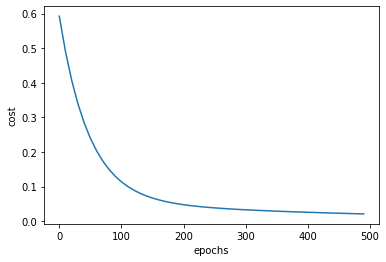

In [ ]:
# Plot the curve for cost vs epoch

from matplotlib import pyplot as plt
plt.plot(epoch_list, cost_list)
plt.xlabel("epochs")
plt.ylabel("cost")
plt.show()